In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
# read the dataset 
df = pd.read_csv("height-weight.csv")

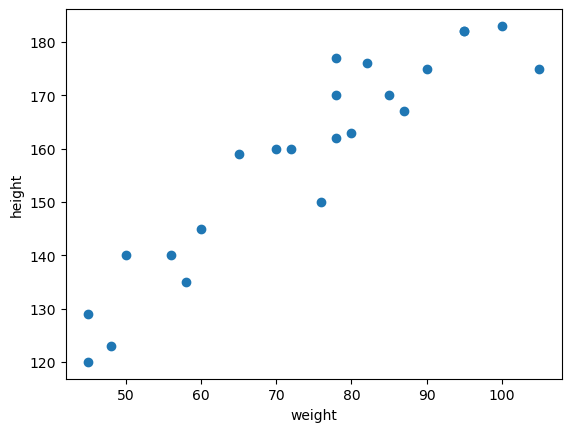

In [81]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [82]:
# Problem Statement >> I want to predict height based on weight

In [83]:
# divide the data into X and y
X = df[["Weight"]]
y = df["Height"]

In [84]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [85]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [87]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [88]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [89]:
y_train

10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [90]:
y_test

20    129
17    159
3     145
13    183
19    167
16    140
Name: Height, dtype: int64

In [91]:
# Scaling(optional) >> standardisation
# Most of the ml model  scandardscaler is used as it deals with normal distribution

In [92]:
scaler = StandardScaler()

In [93]:
scaler

StandardScaler()

In [94]:
# Scaling should be done always after train test split
# target variableshould not be scaled
# avoid scaling categorical features
X_train = scaler.fit_transform(X_train) #for train data use fir transform

In [95]:
X_test = scaler.transform(X_test)

In [96]:
scaler

StandardScaler()

In [97]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [98]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

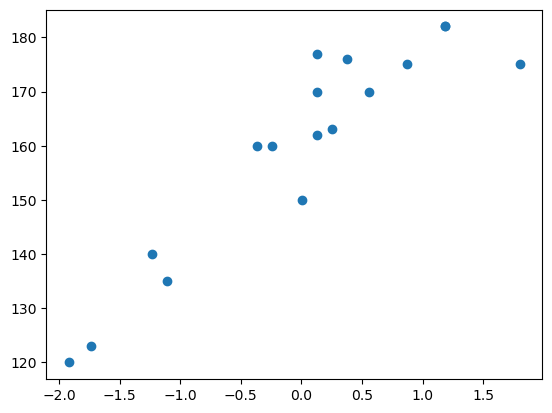

In [103]:
# scaling does not affect the distribution of the data
plt.scatter(X_train, y_train)

In [104]:
# Model training 

# Linear Regression parameters :
# fit_intercept >> the best fit line will have intercept, by default it is true
# copy_X(not necessary) >> copy the original X_train and then build the model, it will not modify the original data
# n_jobs >> if n_jobs = -1 means you want to use all the processors.
# positive(not necessary) >> you want all the coefficients to be positive.

In [105]:
regressor = LinearRegression()

In [106]:
regressor

LinearRegression()

In [107]:
regressor.fit(X_train, y_train)

LinearRegression()

In [108]:
regressor.coef_

array([17.7307072])

In [109]:
regressor.intercept_

160.0

In [110]:
print("The slope or coeff of model is ",regressor.coef_ )
print("The intercept of the model is ", regressor.intercept_)

The slope or coeff of model is  [17.7307072]
The intercept of the model is  160.0


In [111]:
# prediction on train data
# interpretation of coeff >> one unit increase in weight on an avg the height increase by 17.73
# predicted height(y) on Xtrain = 160 + 17.73 * (Xtrain)

In [112]:
# prediction on train data
regressor.predict(X_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

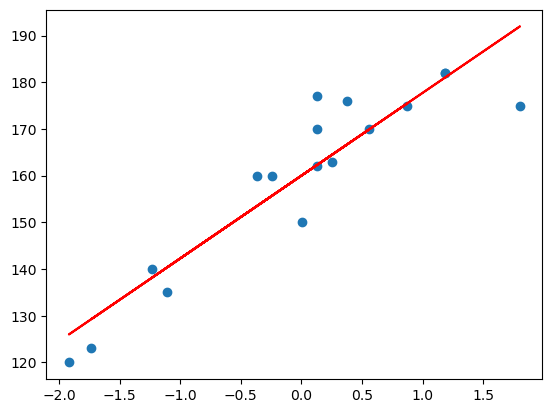

In [113]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [114]:
y_pred_test = regressor.predict(X_test)

In [115]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

In [116]:
y_pred_test, y_test

(array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]),
 20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64)

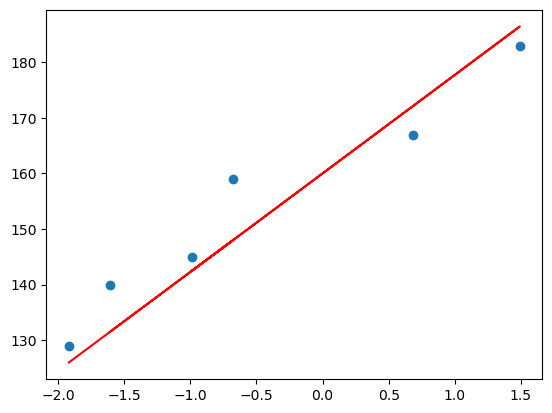

In [117]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test),'r')

In [118]:
# performance metrics
mean_absolute_error(y_test, y_pred_test)

5.608571289304824

In [119]:
mean_squared_error(y_test, y_pred_test)

41.28566283045539

In [130]:
r2 = r2_score(y_test, y_pred_test) # r2 >> 1-SSR/SST
r2

0.872103617425661

In [132]:
# adjusted r2
# R2_adjusted = [1-(1-r2)*n-1/(n-k-1)]

In [133]:
X_test.shape[1]

1

In [136]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# adjusted r2 will be lesser than r2

0.8401295217820762